In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\yurih\appdata\local\programs\python\python311\lib\site-packages\pyfirmata-1.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


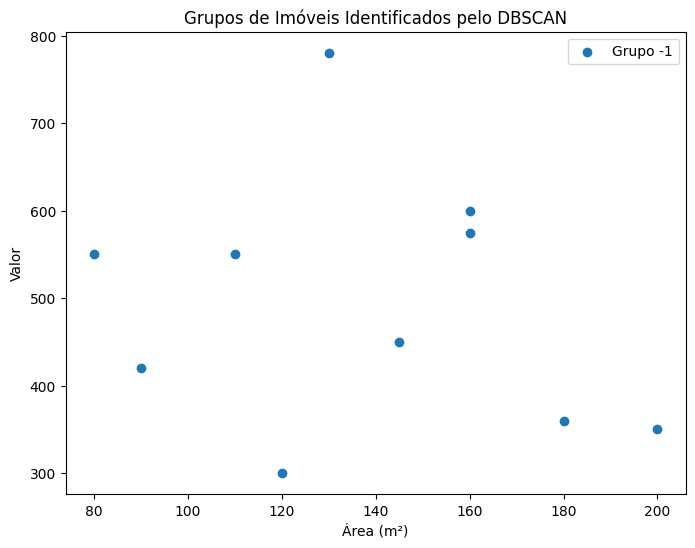

Grupo -1: Valor Médio = 493.50


In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

area = np.array([120, 145, 80, 160, 200, 90, 110, 130, 180, 160])
valor = np.array([300, 450, 550, 600, 350, 420, 550, 780, 360, 575])
dist_praia = np.array([15, 15, 8, 25, 12, 15, 22, 8, 5, 14])

X = np.column_stack((area, dist_praia, valor))

eps = 20 
min_samples = 2 
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

grupos = set(labels)
n_grupos = len(grupos)

plt.figure(figsize=(8, 6))
for grupo in grupos:
    pontos_grupo = X[labels == grupo]
    plt.scatter(pontos_grupo[:, 0], pontos_grupo[:, 2], label=f'Grupo {grupo}')

plt.xlabel('Área (m²)')
plt.ylabel('Valor')
plt.title('Grupos de Imóveis Identificados pelo DBSCAN')
plt.legend()
plt.show()

valores_medios = [np.mean(valor[labels == grupo]) for grupo in grupos]

for grupo, valor_medio in zip(grupos, valores_medios):
    print(f'Grupo {grupo}: Valor Médio = {valor_medio:.2f}')
